In [1]:
#Importing Liberaries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Loading dataset from Yahoo Finance
ticker = "NFLX"  

data = yf.download(ticker, start="2018-01-01", end="2024-01-01")

# Displaying the first few rows
print("Loaded Stock Dataset:")
print(data.head())

[*********************100%***********************]  1 of 1 completed

Loaded Stock Dataset:
Price                       Adj Close       Close        High         Low  \
Ticker                           NFLX        NFLX        NFLX        NFLX   
Date                                                                        
2018-01-02 00:00:00+00:00  201.070007  201.070007  201.649994  195.419998   
2018-01-03 00:00:00+00:00  205.050003  205.050003  206.210007  201.500000   
2018-01-04 00:00:00+00:00  205.630005  205.630005  207.050003  204.000000   
2018-01-05 00:00:00+00:00  209.990005  209.990005  210.020004  205.589996   
2018-01-08 00:00:00+00:00  212.050003  212.050003  212.500000  208.440002   

Price                            Open    Volume  
Ticker                           NFLX      NFLX  
Date                                             
2018-01-02 00:00:00+00:00  196.100006  10966900  
2018-01-03 00:00:00+00:00  202.050003   8591400  
2018-01-04 00:00:00+00:00  206.199997   6029600  
2018-01-05 00:00:00+00:00  207.250000   7033200  
2018-01-08 

In [3]:
#Showing the fetched dataset.
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,,
2018-01-02 00:00:00+00:00,201.070007,201.070007,201.649994,195.419998,196.100006,10966900
2018-01-03 00:00:00+00:00,205.050003,205.050003,206.210007,201.500000,202.050003,8591400
2018-01-04 00:00:00+00:00,205.630005,205.630005,207.050003,204.000000,206.199997,6029600
2018-01-05 00:00:00+00:00,209.990005,209.990005,210.020004,205.589996,207.250000,7033200
2018-01-08 00:00:00+00:00,212.050003,212.050003,212.500000,208.440002,210.020004,5580200
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,486.760010,486.760010,496.019989,485.450012,494.000000,2701100
2023-12-26 00:00:00+00:00,491.190002,491.190002,491.480011,486.380005,489.390015,2034500


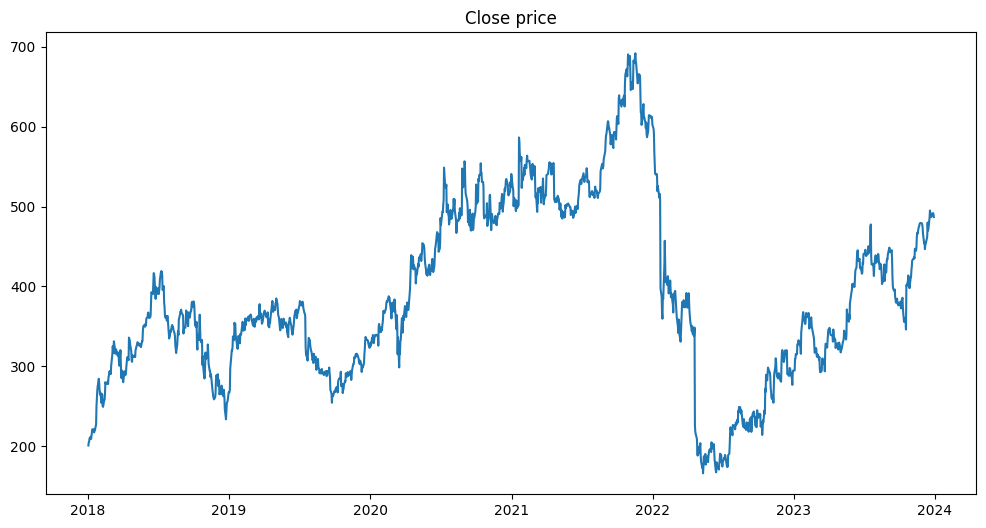

In [4]:
#Plotting the targeted attribute of the dataset.
plt.figure(figsize = (12,6))
plt.title("Close price")
plt.plot(data.Close)
plt.show()

In [5]:
# Preprocessing and feature engineering
# Use 'Close' price for prediction
data = data[['Close']]


In [6]:
# Feature Engineering: Add Moving Averages as features
data['100_MA'] = data['Close'].rolling(window=100).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()


C:\Users\SWATI KUMARI\AppData\Local\Temp\ipykernel_23712\2346664450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['100_MA'] = data['Close'].rolling(window=100).mean()
C:\Users\SWATI KUMARI\AppData\Local\Temp\ipykernel_23712\2346664450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['200_MA'] = data['Close'].rolling(window=200).mean()


In [7]:
#Displaying the data for the 100 moving average.
data['100_MA']

Date
2018-01-02 00:00:00+00:00           NaN
2018-01-03 00:00:00+00:00           NaN
2018-01-04 00:00:00+00:00           NaN
2018-01-05 00:00:00+00:00           NaN
2018-01-08 00:00:00+00:00           NaN
                                ...    
2023-12-22 00:00:00+00:00    425.729399
2023-12-26 00:00:00+00:00    426.331299
2023-12-27 00:00:00+00:00    426.933199
2023-12-28 00:00:00+00:00    427.430699
2023-12-29 00:00:00+00:00    427.916499
Name: 100_MA, Length: 1509, dtype: float64

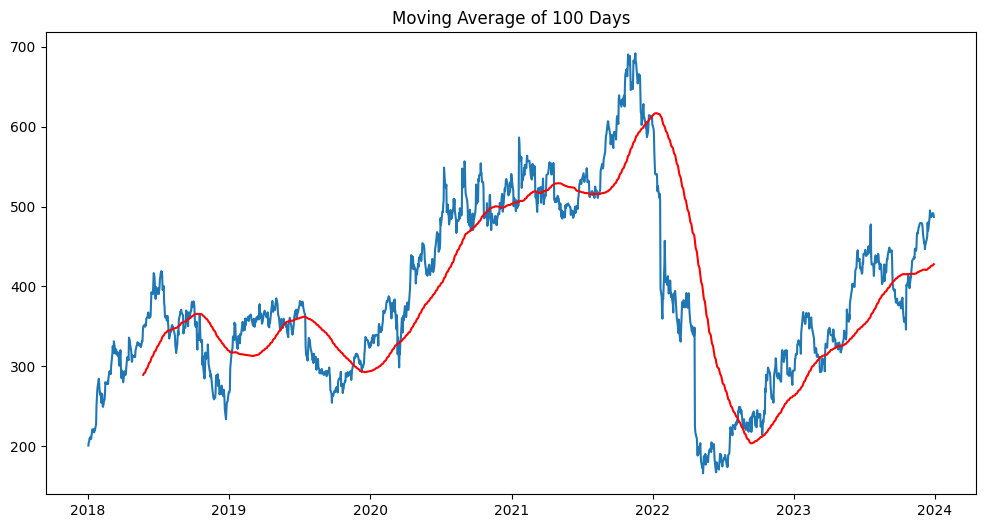

In [8]:
#Plotting 100 days moving average.
plt.figure(figsize = (12,6))
plt.title("Moving Average of 100 Days")
plt.plot(data.Close)
plt.plot(data['100_MA'], 'r')

In [9]:
#Displaying the data for the 100 moving average.
data['200_MA']

Date
2018-01-02 00:00:00+00:00          NaN
2018-01-03 00:00:00+00:00          NaN
2018-01-04 00:00:00+00:00          NaN
2018-01-05 00:00:00+00:00          NaN
2018-01-08 00:00:00+00:00          NaN
                               ...    
2023-12-22 00:00:00+00:00    400.51475
2023-12-26 00:00:00+00:00    401.50690
2023-12-27 00:00:00+00:00    402.49830
2023-12-28 00:00:00+00:00    403.47615
2023-12-29 00:00:00+00:00    404.39160
Name: 200_MA, Length: 1509, dtype: float64

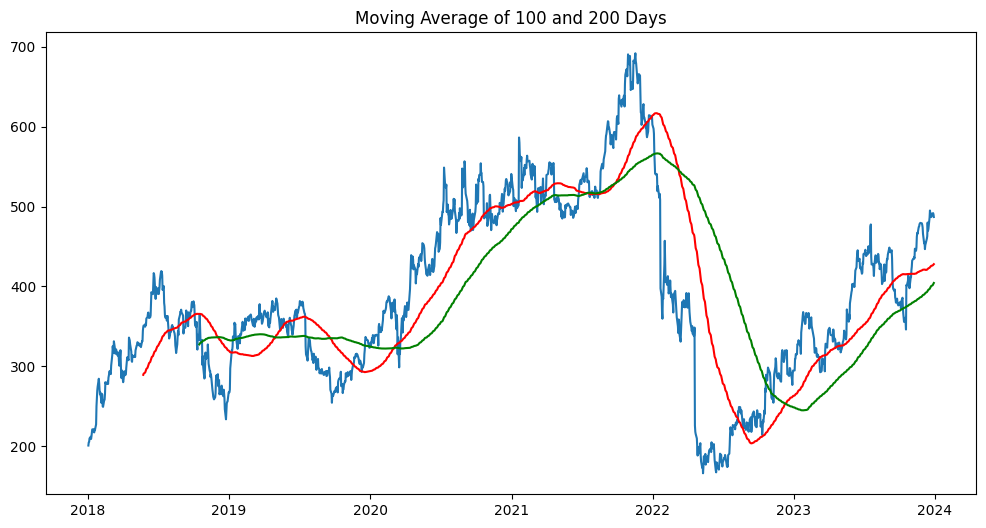

In [10]:
#Plotting 100 and 200 days moving average.
plt.figure(figsize = (12,6))
plt.title("Moving Average of 100 and 200 Days")
plt.plot(data.Close)
plt.plot(data['100_MA'], 'r')
plt.plot(data['200_MA'], 'g')

In [11]:
# Drop rows with NaN values (initial rows due to rolling mean)
data.dropna(inplace=True)


C:\Users\SWATI KUMARI\AppData\Local\Temp\ipykernel_23712\2388769375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [12]:
# Prepare the features (X) and labels (y)
X = data[['100_MA', '200_MA']]  # Features: 100-day and 200-day moving averages
y = data['Close']  # Label: Close price

# Scale the features and labels
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
scaled_labels = scaler.fit_transform(y.values.reshape(-1, 1))

In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_labels, test_size=0.2, random_state=42)


In [14]:
# Define and expand individual models
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions

def svr_model(X_train, y_train, X_test):
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    return model, predictions

def random_forest(X_train, y_train, X_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    return model, predictions

#def knn_regressor(X_train, y_train, X_test):
   # model = KNeighborsRegressor(n_neighbors=5)
   # model.fit(X_train, y_train.ravel())
   # predictions = model.predict(X_test)
   # return model, predictions

def decision_tree(X_train, y_train, X_test):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train.ravel())
    predictions = model.predict(X_test)
    return model, predictions

In [15]:
# Train and evaluate each model
models = {
    "Linear Regression": linear_regression,
    "SVR": svr_model,
    "Random Forest": random_forest,
   # "K-NN Regression": knn_regressor,
    "Decision Tree": decision_tree,
}

In [16]:
results = {}

In [17]:
for name, func in models.items():
    model, predictions = func(X_train, y_train, X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Store results
    results[name] = {
        "Model": model,
        "Predictions": predictions,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
    }
    
    # Print metrics for each model
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² (Accuracy): {r2:.4f}\n")

Linear Regression:
  MSE: 0.0110
  MAE: 0.0821
  RMSE: 0.1050
  R² (Accuracy): 0.7559

SVR:
  MSE: 0.0084
  MAE: 0.0702
  RMSE: 0.0917
  R² (Accuracy): 0.8138

Random Forest:
  MSE: 0.0036
  MAE: 0.0282
  RMSE: 0.0597
  R² (Accuracy): 0.9210

Decision Tree:
  MSE: 0.0053
  MAE: 0.0272
  RMSE: 0.0726
  R² (Accuracy): 0.8833



In [18]:
# Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ("Linear Regression", results["Linear Regression"]["Model"]),
        ("SVR", results["SVR"]["Model"]),
        ("Random Forest", results["Random Forest"]["Model"]),
       # ("K-NN Regression", results["K-NN Regression"]["Model"]),
        ("Decision Tree", results["Decision Tree"]["Model"]),
    ],
    final_estimator=LinearRegression()
)

In [19]:
# Train the stacking regressor
stacking_regressor.fit(X_train, y_train.ravel())
y_pred_stacking = stacking_regressor.predict(X_test)


In [20]:
# Evaluate stacking regressor
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)


In [21]:
# Add stacking results
results["Stacking"] = {
    "Model": stacking_regressor,
    "Predictions": y_pred_stacking,
    "MSE": mse_stacking,
    "MAE": mae_stacking,
    "RMSE": rmse_stacking,
    "R²": r2_stacking,
}

In [22]:
# Print stacking metrics
print("Stacking:")
print(f"  MSE: {mse_stacking:.4f}")
print(f"  MAE: {mae_stacking:.4f}")
print(f"  RMSE: {rmse_stacking:.4f}")
print(f"  R² (Accuracy): {r2_stacking:.4f}\n")

Stacking:
  MSE: 0.0035
  MAE: 0.0279
  RMSE: 0.0589
  R² (Accuracy): 0.9230



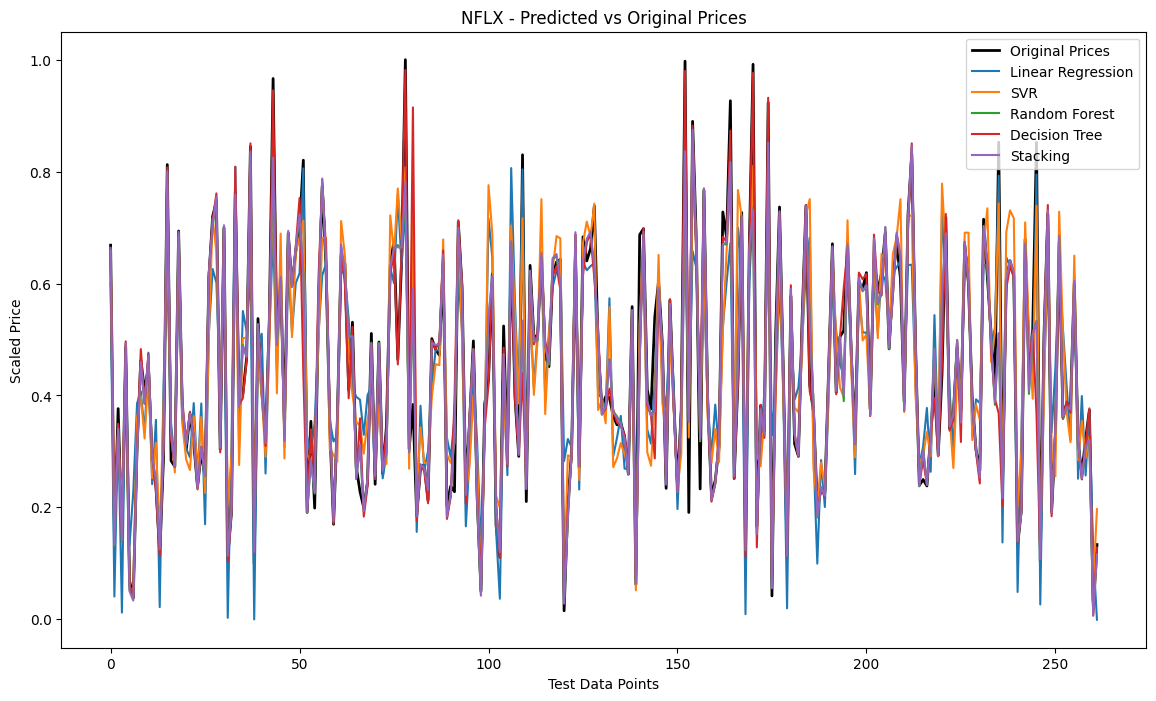

In [23]:
# Plot predicted vs original prices
plt.figure(figsize=(14, 8))
plt.plot(y_test, label="Original Prices", color='black', linewidth=2)

for name, metrics in results.items():
    plt.plot(metrics["Predictions"], label=name, linestyle='-')

plt.title(f"{ticker} - Predicted vs Original Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()

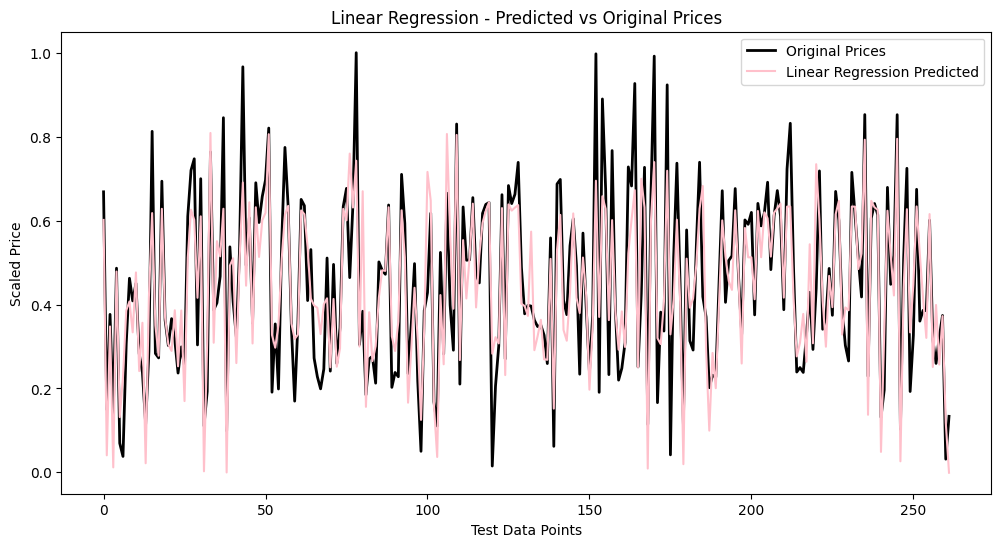

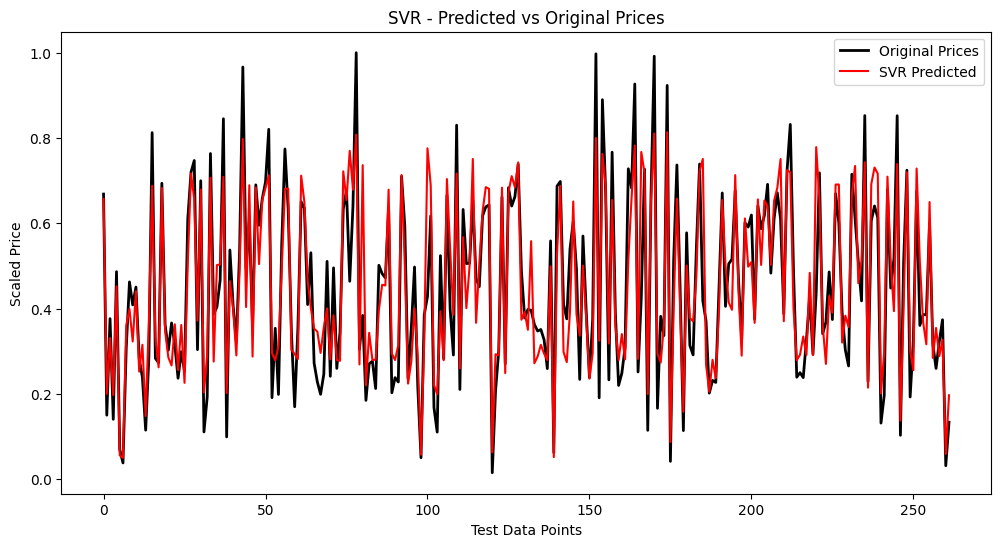

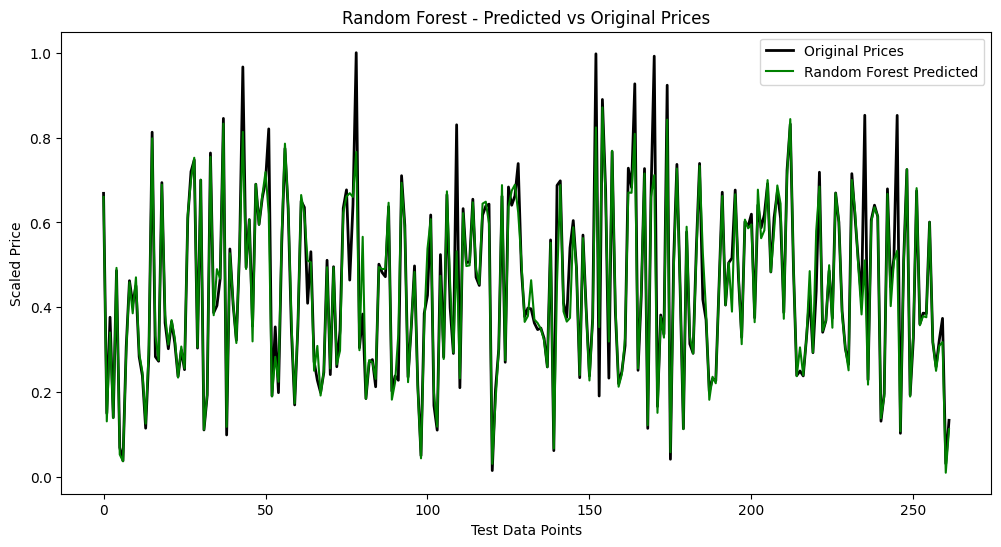

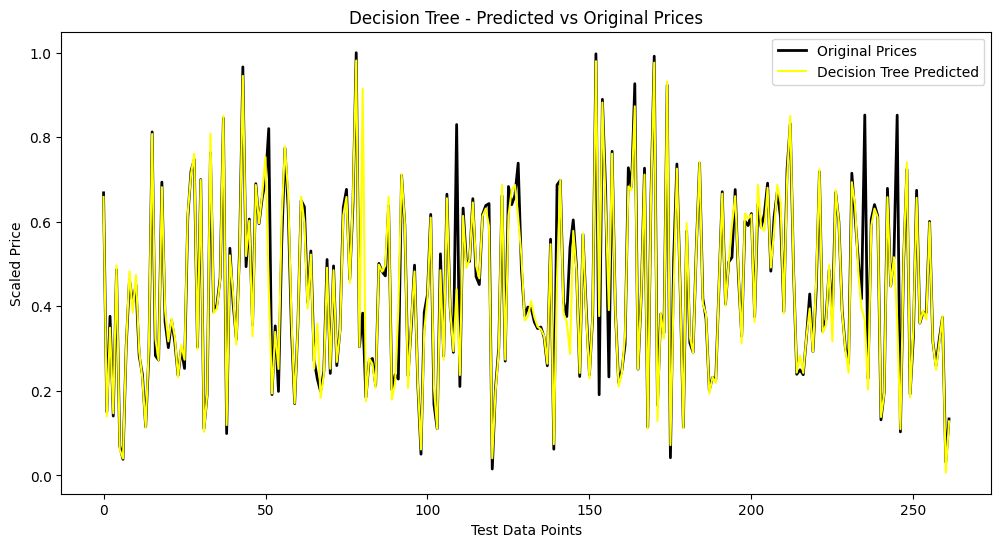

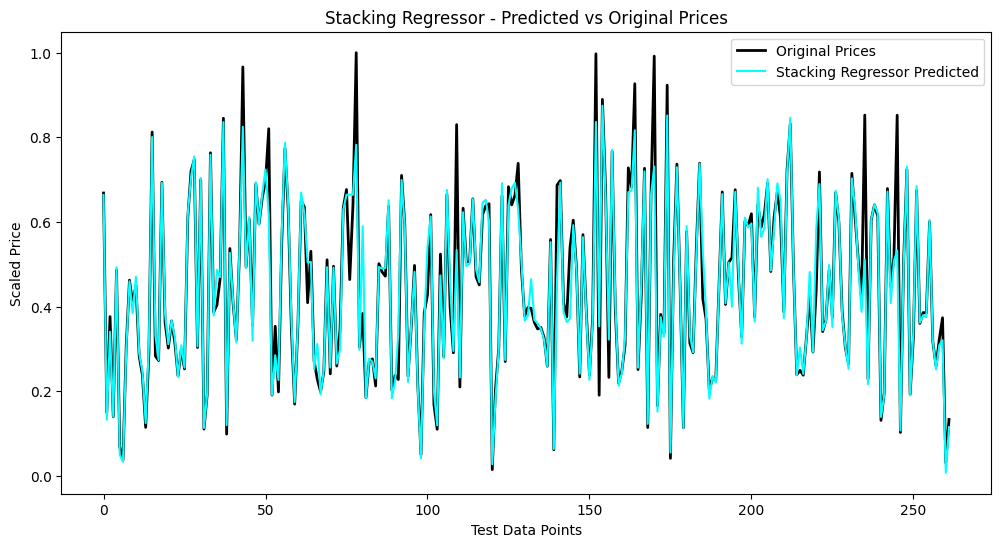

In [24]:

# Plotting Predicted vs Original Prices for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Original Prices", color='black', linewidth=2)
plt.plot(results["Linear Regression"]["Predictions"], label="Linear Regression Predicted",color='pink', linestyle='-')
plt.title("Linear Regression - Predicted vs Original Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()

# Plotting Predicted vs Original Prices for SVR
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Original Prices", color='black', linewidth=2)
plt.plot(results["SVR"]["Predictions"], label="SVR Predicted",color='red', linestyle='-')
plt.title("SVR - Predicted vs Original Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()

# Plotting Predicted vs Original Prices for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Original Prices", color='black', linewidth=2)
plt.plot(results["Random Forest"]["Predictions"], label="Random Forest Predicted",color='green', linestyle='-')
plt.title("Random Forest - Predicted vs Original Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()

# Plotting Predicted vs Original Prices for K-NN Regression
#plt.figure(figsize=(12, 6))
#plt.plot(y_test, label="Original Prices", color='black', linewidth=2)
#plt.plot(results["K-NN Regression"]["Predictions"], label="K-NN Regression Predicted",color='orange', linestyle='-')
#plt.title("K-NN Regression - Predicted vs Original Prices")
#plt.xlabel("Test Data Points")
#plt.ylabel("Scaled Price")
#plt.legend()
#plt.show()


# Plotting Predicted vs Original Prices for Decision Tree Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Original Prices", color='black', linewidth=2)
plt.plot(results["Decision Tree"]["Predictions"], label="Decision Tree Predicted",color='yellow', linestyle='-')
plt.title("Decision Tree - Predicted vs Original Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()

# Plotting Predicted vs Original Prices for Stacking Regressor
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Original Prices", color='black', linewidth=2)
plt.plot(results["Stacking"]["Predictions"], label="Stacking Regressor Predicted",color='cyan', linestyle='-')
plt.title("Stacking Regressor - Predicted vs Original Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Scaled Price")
plt.legend()
plt.show()


In [25]:
#Showing the model who is most accurate.
best_model_name = max(results, key=lambda x: results[x]["R²"])
best_model = results[best_model_name]
print(f"The best model based on R² (Accuracy) is: {best_model_name} with an R² of {best_model['R²']:.4f}")


The best model based on R² (Accuracy) is: Stacking with an R² of 0.9230
